**IRIS FLOWER CLASSIFICATION**


Name - Md. Arshan Shaikh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.shape

(150, 6)

In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

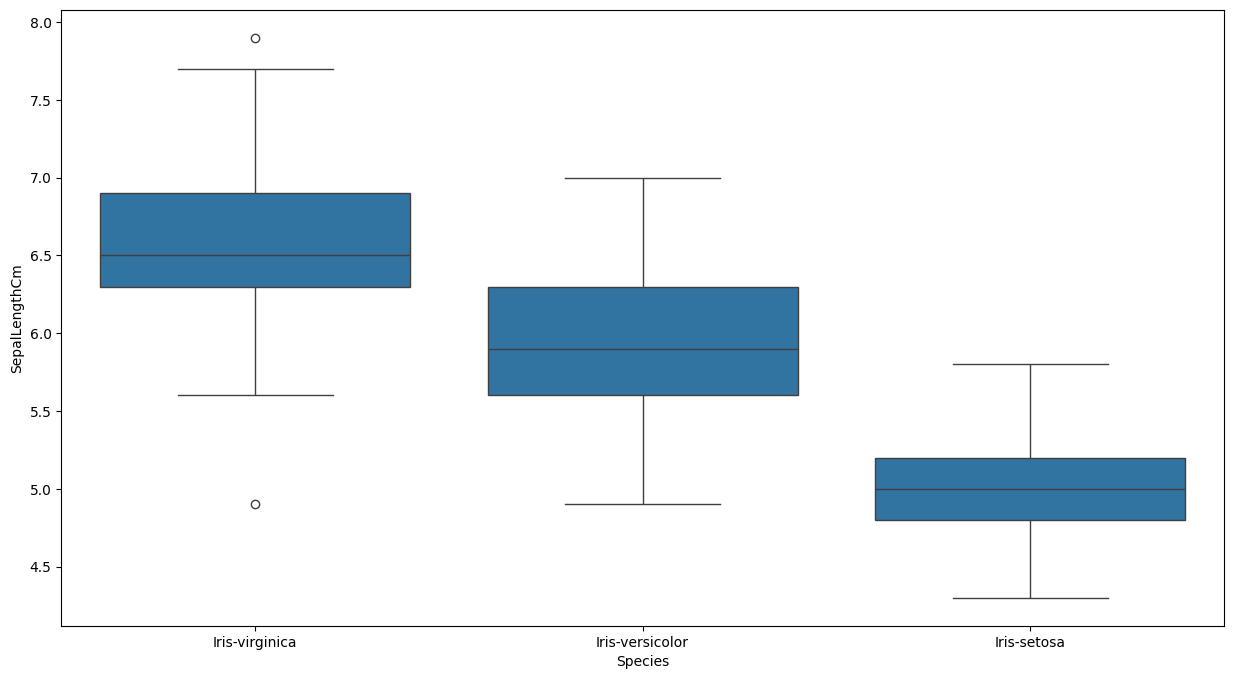

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

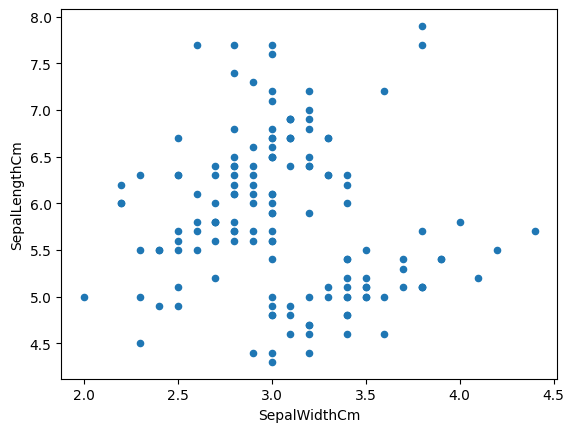

In [13]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

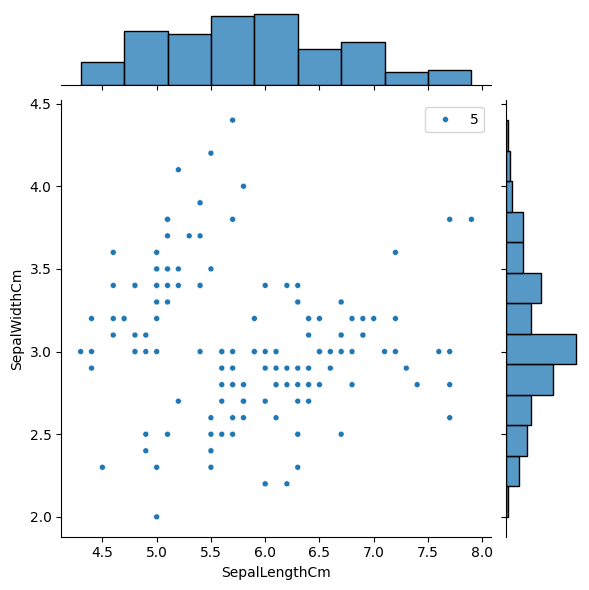

In [14]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

In [19]:
X=df.drop('Species',axis=1)
y=df['Species']

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [21]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
y = to_categorical(df.Species)


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [23]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 100ms/step - loss: 1.3280 - accuracy: 0.3333 - val_loss: 1.1546 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 17ms/step - loss: 1.1143 - accuracy: 0.3333 - val_loss: 1.0059 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 17ms/step - loss: 0.9859 - accuracy: 0.3529 - val_loss: 0.9437 - val_accuracy: 0.5778
Epoch 4/45
4/4 [==============================] - 0s 17ms/step - loss: 0.9359 - accuracy: 0.6373 - val_loss: 0.9135 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 14ms/step - loss: 0.9062 - accuracy: 0.6667 - val_loss: 0.8681 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 17ms/step - loss: 0.8566 - accuracy: 0.6667 - val_loss: 0.8127 - val_accuracy: 0.6667
Epoch 7/45
4/4 [==============================] - 0s 18ms/step - loss: 0.8009 - accuracy: 0.7157 - val_loss: 0.7680 - val_accuracy: 0.6667
Epoch 8/45
4/4 [==========

In [26]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3728 - accuracy: 0.8889


[0.37283414602279663, 0.8888888955116272]

In [27]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 123ms/step
[[0.00283358 0.2753772  0.7217892 ]
 [0.00225861 0.28045645 0.7172848 ]
 [0.05532246 0.5528092  0.3918683 ]
 [0.02960834 0.50903994 0.46135172]
 [0.94229937 0.04554163 0.01215902]
 [0.02939654 0.5380469  0.43255657]
 [0.00242815 0.2291388  0.7684329 ]
 [0.00277496 0.24382702 0.7533979 ]
 [0.9421787  0.04616497 0.01165631]
 [0.00695634 0.32836437 0.66467935]]


In [28]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [29]:
history.history['accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.3529411852359772,
 0.6372548937797546,
 0.6666666865348816,
 0.6666666865348816,
 0.7156862616539001,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.656862735748291,
 0.6764705777168274,
 0.813725471496582,
 0.970588207244873,
 0.9215686321258545,
 0.8921568393707275,
 0.9215686321258545,
 0.9117646813392639,
 0.8529411554336548,
 0.7745097875595093,
 0.686274528503418,
 0.7450980544090271,
 0.9607843160629272,
 0.9313725233078003,
 0.9509803652763367,
 0.9803921580314636,
 0.9901960492134094,
 0.9215686321258545,
 0.8039215803146362,
 0.7941176295280457,
 0.9607843160629272,
 0.8921568393707275,
 0.7745097875595093,
 0.9117646813392639,
 0.9803921580314636,
 0.970588207244873,
 0.9215686321258545,
 0.8627451062202454,
 0.843137264251709,
 0.8529411554336548,
 0.9509803652763367,
 0.9803921580314636,
 0.9901960492134094,
 0.9803921580314636,
 0.970588207244873]

In [30]:
history.history['val_accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.5777778029441833,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7777777910232544,
 0.8888888955116272,
 0.9555555582046509,
 0.8888888955116272,
 0.9111111164093018,
 0.9111111164093018,
 0.8222222328186035,
 0.7777777910232544,
 0.7111111283302307,
 0.7111111283302307,
 0.8888888955116272,
 0.9555555582046509,
 0.8888888955116272,
 0.9555555582046509,
 0.9555555582046509,
 0.9111111164093018,
 0.7777777910232544,
 0.7555555701255798,
 0.8888888955116272,
 0.9555555582046509,
 0.7777777910232544,
 0.8888888955116272,
 0.9555555582046509,
 0.9111111164093018,
 0.8888888955116272,
 0.8666666746139526,
 0.7777777910232544,
 0.7777777910232544,
 0.8888888955116272,
 0.9555555582046509,
 0.9777777791023254,
 0.9555555582046509,
 0.9111111164093018,
 0.8888888955116272]

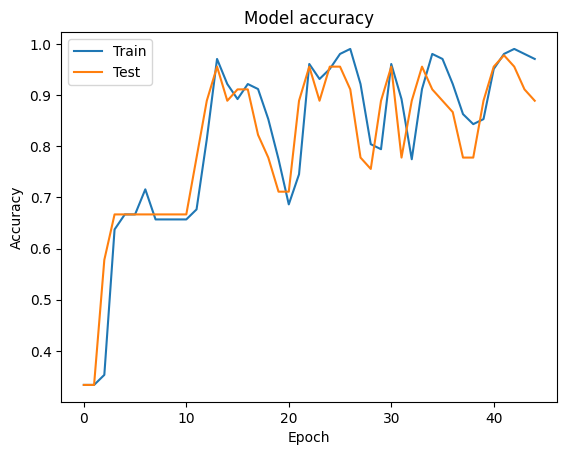

In [31]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

